[1.31953541e+01+0.j 9.31587439e+00+0.j 4.47744770e+00+0.j
 1.10867569e+00+0.j 9.19442511e-01+0.j 3.48987525e-01+0.j
 2.43042115e-01+0.j 1.79407080e-01+0.j 8.22122790e-02+0.j
 4.76907623e-02+0.j 2.73570241e-02+0.j 1.62415521e-02+0.j
 1.45355013e-02+0.j 9.11583172e-03+0.j 7.48485286e-03+0.j
 5.58356398e-03+0.j 5.13713697e-03+0.j 3.89940291e-03+0.j
 1.74198488e-03+0.j 1.31524845e-03+0.j 8.40018233e-04+0.j
 3.10874004e-04+0.j 2.61303302e-04+0.j 1.63991430e-04+0.j
 1.08667086e-04+0.j 9.71379956e-07+0.j 8.31437572e-05+0.j
 2.27493454e-05+0.j 4.25076766e-05+0.j 5.21687728e-05+0.j]


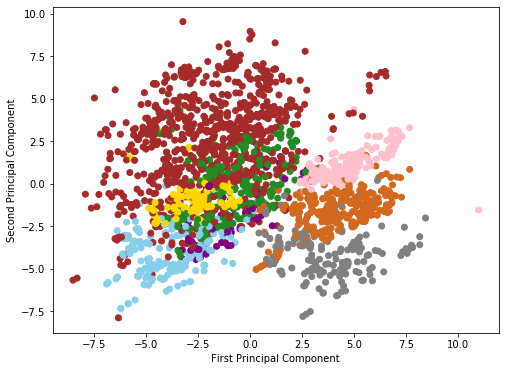

In [3]:
# The input of this program is a .csv data sheet
# set up in a special format (see given example). 
# The program standardizes the input data then 
# performs PCA analysis on it. Outputs PCA graph 
# and covariance matrix. 

#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# read excel (examples of how to set up your data given in folder)
data = pd.read_csv("~/Desktop/DLChem/notebooks/data/qm9_i6_30f/3000-test-points/rep-o.csv") 

# scale the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

#print(scaled_data)

#perform PCA fit and decompose the data
from sklearn.decomposition import  PCA
pca = PCA(n_components = 30)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)      

#print(x_pca.shape)
label= pd.read_csv("~/Desktop/DLChem/notebooks/data/qm9_i6_30f/3000-test-points/label-o.csv")
#labelO= pd.read_csv("./pca/labelO.csv")
#labelH=pd.read_csv("./pca/labelH.csv")
#plot figure
colors=['brown','gold','skyblue','purple','lightcoral','forestgreen','brown','pink','chocolate','grey']
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=label['Target'],cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


cov = pca.get_covariance()
#print(cov)
# optional print covariance and associated eigenvectors
#print('covariance')
#print(cov)

#print(pca.components_) 

import scipy.linalg as la
eig, ev = la.eig(cov)
print(eig)


#print(ev)